# Sensitivity of hydrological length scale *cgs*

## Relative errors mean annual fluxes

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from scipy.misc import imread
import matplotlib.cbook as cbook

<Figure size 1280x400 with 0 Axes>

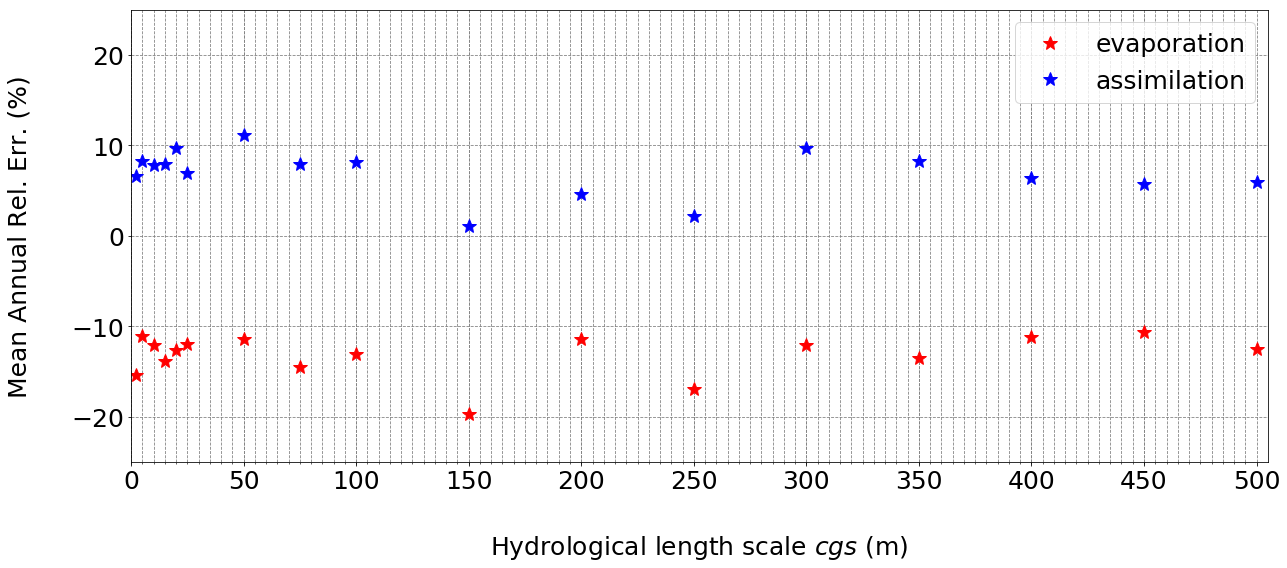

In [3]:
#load data
vals = np.arange(5, 505, 5)
vals = np.append([2],vals)
#labels = ''.join(str(e) for e in vals)
#labels = map(str, np.round(vals,2) ) 
labels = map("{:.0f}".format, vals)
labels = list(labels)

#format(value, '.2f')

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(18, 8), sharex=True, sharey=True)   

i = 0
skipped = 0


loc = 1
#loop over all cpcff-values for the free-draining case
for label in labels:   

    try:
        ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/ass_beststats.txt") #mm/d       

        if(i == 0):
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=15, label="evaporation" ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=15, label="assimilation" ) 
        else:
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=15 ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=15 ) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
        #  label + "/sce_stats_best/ass_beststats.txt')")
    i = i + 1


ax.set_ylim([-25, 25])    
ax.set_xlim([0, 505])    
ax.grid(b=True, which='both', color='grey', axis="both", linestyle='--')

ax.set_xticks( np.arange(0,550, 50)  )  
ax.set_xticks( np.arange(0,500, 5), minor=True )  

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
plt.xlabel(r"Hydrological length scale $cgs$ (m)", size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(prop={'size': 25})
plt.tight_layout()
plt.show()
    

**Figure S5.1.** Relative error for the mean annual fluxes with evaporation in red and assimilation in blue. The different parameterizations of the length scale cgs do not lead to large differences for the (relative error of) mean annual values of assimilation and evaporation.

## Timeseries of evaporation


<Figure size 1280x1200 with 0 Axes>

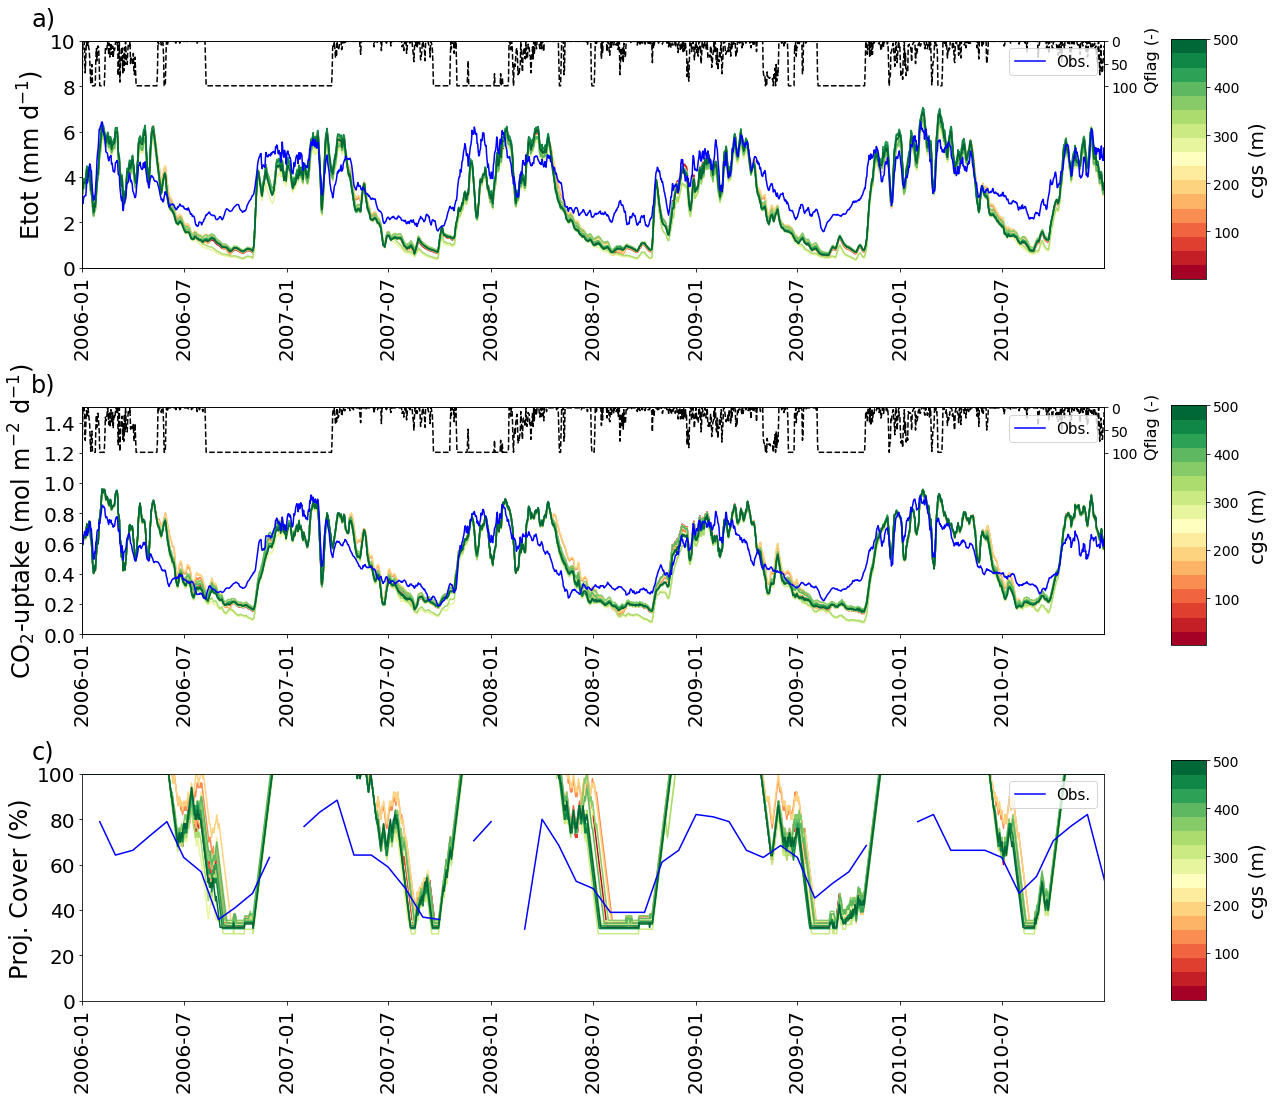

In [4]:
%run ../../src_py/plot_et_ass_pc.py \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_350/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt \
-ys 2006 -ye 2010 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.05 --yloc_title 1.10 --size_title 24 --moving_average 7 --palette RdYlGn \
--plot_cbar True --cblabel "cgs (m)" --cbar_max 500 --cbar_min 2

**Figure S5.2.** VOM-results for different values of the hydrological length scale cgs (color scale) for Howard Springs, with a) the total evaporation, with flux tower observations in blue b) CO$_2$-assimilation, with flux tower observations in blue and c) projective cover, with the observed fraction of vegetation cover based on fPAR-data (Donohue et al, 2008) in blue. Generally, the timeseries do not show large differences when only the length scale parameter is adjusted.

## Groundwater tables

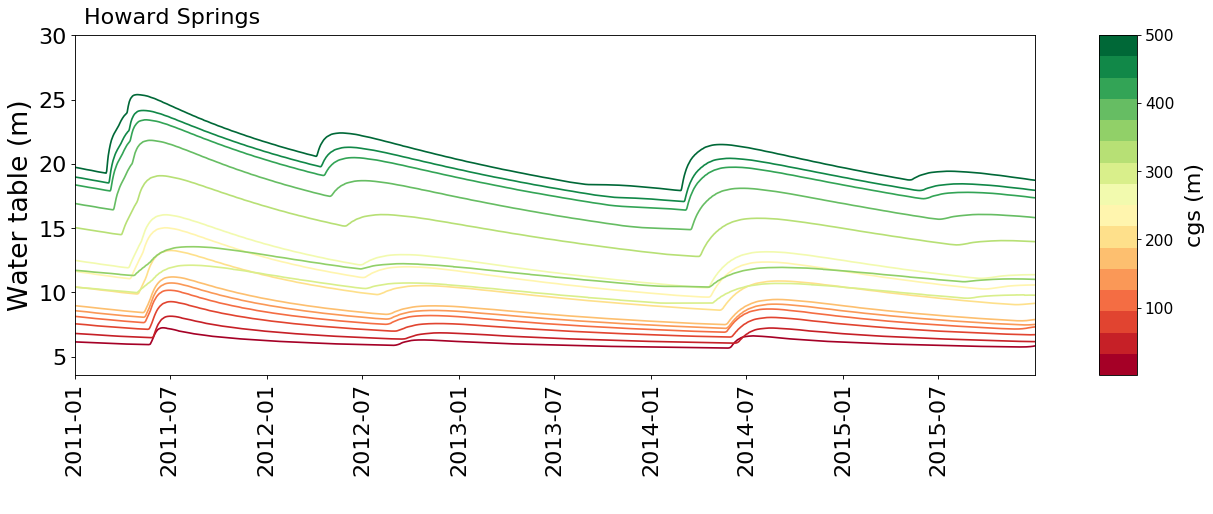

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt \
-v zw -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Water table (m)" --plot_cbar \
True --cbar_max 500 --cbar_min 2 --cblabel "cgs (m)" --labels VOM VOM2 \
--title "Howard Springs" --palette RdYlGn 


**Figure S5.3.** Timeseries of groundwater tables for Howard Springs for different values of the hydrological lenghtscale cgs(color scale). Water tables are shown relative to the bottom of the soil column. The water tables go up for increasing cgs-values, but do not reach the surface (which is at 30.00m. The sensitivity in the  groundwater is much higher compared to the fluxes.

## Influence storage on fluxes

In [6]:
input_cgs = ["../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt", 
"../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt",
 "../../data/VOM_output/additional_analyses/sens_cgs/HS_350/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt",
"../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt"]

ws = []
su = []
for i in range(0, len(input_cgs)):
    data = np.genfromtxt(input_cgs[i], names=True)
    ws.append( (data["ws"] ))
    su.append( (data["su_avg"] ))
    
#values observations
obs = (np.loadtxt("../../data/DINGO/Ea_howard.txt", usecols=2) )   #mm/d

#date/times observations
tobs = np.genfromtxt("../../data/DINGO/Ea_howard.txt",usecols=0, dtype=np.str )#mm/d
tobs = pd.date_range(tobs[0], tobs[-1], freq='D')   

obs_pd = pd.Series(obs, index= tobs)

tmod = pd.date_range(datetime(int(data["fyear"][0]),int(data["fmonth"][0]),int(data["fday"][0])), 
                  datetime(int(data["fyear"][-1]),int(data["fmonth"][-1]),int(data["fday"][-1])), freq='D')

#make dataframes for ws and su_ave
ws_pd = pd.DataFrame(ws)
su_pd = pd.DataFrame(su)

ws_pd = ws_pd.transpose()
su_pd = su_pd.transpose()

ws_pd.index= tmod
su_pd.index= tmod

#get values at start of dry season (May 1)
ws_may1 = ws_pd[ (ws_pd.index.month == 5) & (ws_pd.index.day == 1) & (ws_pd.index.year >= obs_pd.index.year[0]) 
              & (ws_pd.index.year <= obs_pd.index.year[-1])  ]

su_may1 = su_pd[ (su_pd.index.month == 5) & (su_pd.index.day == 1) & (su_pd.index.year >= obs_pd.index.year[0]) 
              & (su_pd.index.year <= obs_pd.index.year[-1])  ]


In [7]:
# read errors
vals = np.arange(5, 505, 5)
vals = np.append([2],vals)
#labels = ''.join(str(e) for e in vals)
#labels = map(str, np.round(vals,2) ) 
labels = map("{:.0f}".format, vals)
labels = list(labels)

err_dry = []
skipped = 0
for label in labels:  
    
    try:
        ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
              label + "/sce_stats_best/evap_beststats.txt") 

        err_dry.append(ebest_stats[2])
    except IOError:
        skipped = skipped + 1 

<Figure size 1280x400 with 0 Axes>

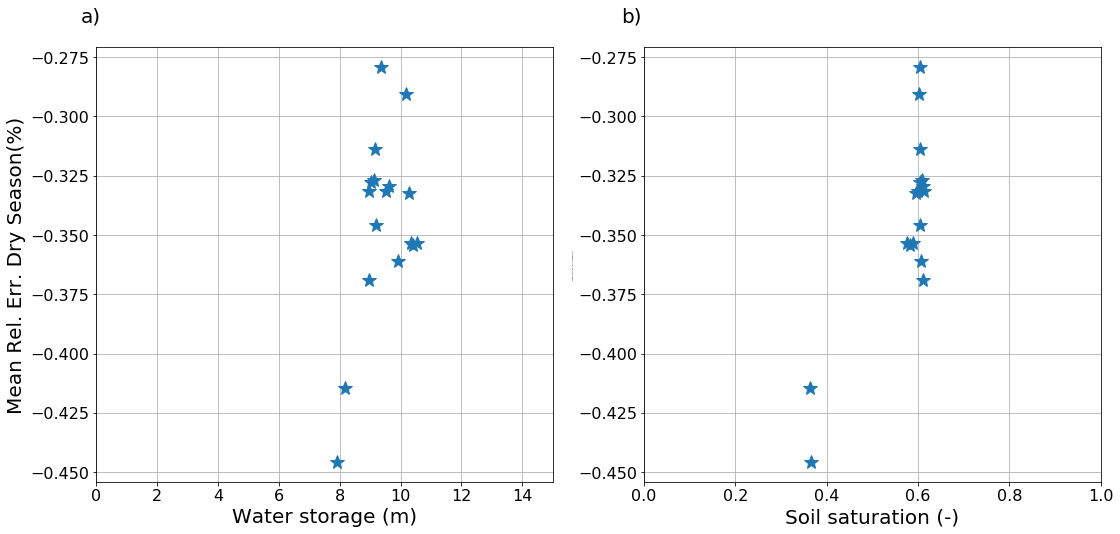

In [8]:

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))   


ax[0].plot(  np.mean(ws_may1), err_dry, "*" , ms=15      )
ax[0].set_xlim([0, 15])    
ax[0].set_xlabel(r"Water storage (m)", size = 20)
ax[0].set_ylabel('Mean Rel. Err. Dry Season(%)', size = 20)
ax[0].text( x=-0.5, y=-0.26, s="a)",  fontsize = 20)
ax[0].grid()

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
    
ax[1].plot(  np.mean(su_may1), err_dry, "*" , ms=15    )
ax[1].set_xlim([0, 1])    

    
ax[1].set_xlabel(r"Soil saturation (-)", size = 20)
ax[1].set_ylabel('Mean Rel. Err. Dry Season(%)', size = 2)
ax[1].text( x=-0.05, y=-0.26, s="b)",  fontsize = 20)
ax[1].grid()


for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
plt.show()

**Figure S5.4.** Relative error between modelled and flux tower evaporation against a) mean total water storage at May 1 (start of dry season) and b) mean unsaturated soil saturation degree at May 1, both for different values of the parameter cgs.